In [1]:
# ==============================================================================
# Import modules
# ==============================================================================

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# ==============================================================================
# Load data and select features
# ==============================================================================
data = datasets.load_wine()
features = [0, 10]
X = data.data[:, features]
y = data.target
feature_names = [data.feature_names[i] for i in features]

# ==============================================================================
# Split into training and test data
# ==============================================================================

# Print lables of all classes in data set
print("Class labels:", np.unique(y))


# Split data into training and test data (60% training, 40% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5, stratify=y)


# Show distribution of classes in input data, training data and test data
# Alternative 1
print(f"Labels counts in y: {np.bincount(y)}")
print(f"Labels counts in y_train: {np.bincount(y_train)}")
print(f"Labels counts in y_test: {np.bincount(y_test)}")
print()


# Show distribution of classes in input data, training data and test data
# Alternative 2
unique, counts = np.unique(y, return_counts=True)
print("Labels counts in y:", unique, counts)

unique, counts = np.unique(y_train, return_counts=True)
print("Labels counts in y_train:", unique, counts)

unique, counts = np.unique(y_test, return_counts=True)
print("Labels counts in y_test:", unique, counts)

Class labels: [0 1 2]
Labels counts in y: [59 71 48]
Labels counts in y_train: [35 42 29]
Labels counts in y_test: [24 29 19]

Labels counts in y: [0 1 2] [59 71 48]
Labels counts in y_train: [0 1 2] [35 42 29]
Labels counts in y_test: [0 1 2] [24 29 19]


In [3]:
# ==============================================================================
# Scale features using StandardScaler class in scikit-learn
# ==============================================================================

# Initialise standard scaler and compute mean and STD from training data
sc = StandardScaler()
sc.fit(X_train)


# Transform (standardise) both X_train and X_test with mean and stddev from
# training data
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

print("Mean of X_train_sc:", np.mean(X_train_sc, axis=0))
print("Stddev of X_train_sc:", np.std(X_train_sc, axis=0))


# ==============================================================================
# Train multiclass perceptron of scikit-learn
# ==============================================================================

# Initialise the model
clf = LogisticRegression(max_iter=100, random_state=77, multi_class="ovr")
clf.fit(X_train_sc, y_train)


# ==============================================================================
# Make predictions for the test set
# ==============================================================================

# Predict classes for samples in test set and print number of misclassfications
y_pred = clf.predict(X_test_sc)
print("Misclassified samples: {0}".format((y_test != y_pred).sum()))


# ==============================================================================
# Compute performance metrics
# ==============================================================================

# Print accuracy computed from predictions on the test set
print("Accuracy: {0:.2f}".format(accuracy_score(y_test, y_pred)))


# Print accuracy computed from predictions on the test set
print("Accuracy: {0:.2f}".format(clf.score(X_test_sc, y_test)))

Mean of X_train_sc: [-2.48333848e-15 -8.38951550e-16]
Stddev of X_train_sc: [1. 1.]
Misclassified samples: 13
Accuracy: 0.82
Accuracy: 0.82


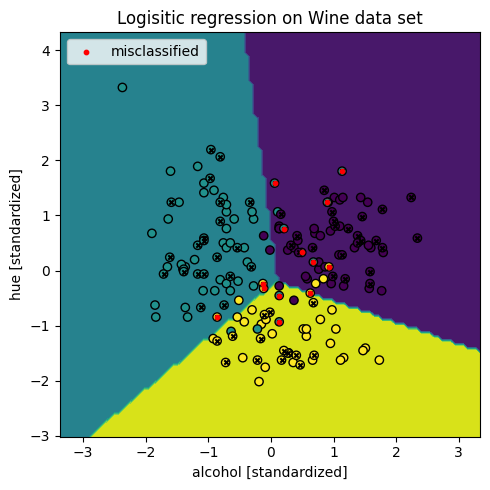

In [4]:
# ==============================================================================
# Plot results with plot function for decision regions using scikit-learn
# ==============================================================================

X_combined_sc = np.vstack((X_train_sc, X_test_sc))
y_combined = np.hstack((y_train, y_test))

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

plot = DecisionBoundaryDisplay.from_estimator(
    estimator=clf,
    X=X_combined_sc,
    alpha=1.0,
    ax=ax,
    response_method="predict",
    xlabel=f"{feature_names[0]} [standardized]",
    ylabel=f"{feature_names[1]} [standardized]",
)

plot.ax_.scatter(X_combined_sc[:, 0], X_combined_sc[:, 1], c=y_combined, marker="o", edgecolor="k")

# Highlight test samples
plot.ax_.scatter(
    X_test_sc[:, 0],
    X_test_sc[:, 1],
    marker="x",
    s=10,
    c="k",
)

# Highlight misclassified test samples
plot.ax_.scatter(
    X_test_sc[y_test != y_pred, 0],
    X_test_sc[y_test != y_pred, 1],
    marker="o",
    s=10,
    c="r",
    facecolors="none",
    label="misclassified",
)

plt.legend(loc="upper left")
plt.title("Logisitic regression on Wine data set")
plt.tight_layout()
plt.show()

# =============================================================================
# Get weights, number of iterations (epochs)
# =============================================================================

nump_epochs = clf.n_iter_
weights = clf.coef_
bias = clf.intercept_